# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 01</span>

Quest'esercitazione riguarda l'utilizzo del generatore di numeri pseudo-casuali (RNG) e come esso possa essere utilizzato nel contesto dei metodi Monte Carlo.

## <span style="color:blue"> Esercizio 01.1 </span>

Per testare il RNG si è stimato $\langle r \rangle = \int_0^1 r dr = 1/2$ come il valor medio di un'osservabile uniformemente distribuita tra $[0,1)$.  
Sono quindi stati estratti uniformemente 100000 valori di $r$, divisi in 100 blocchi: per ogni blocco si è ottenuta una stima di $\langle r \rangle$ calcolando il valor medio e l'incertezza statistica associata (deviazione standard della media). I risultati della media progressiva dei blocchi di $\langle r \rangle$ e delle varianze $\langle (r-1/2)^2 \rangle = \sigma^2$, con i loro rispettivi errori, sono mostrati nei seguenti plot. 

### Grafico $\langle r \rangle - \frac{1}{2}$

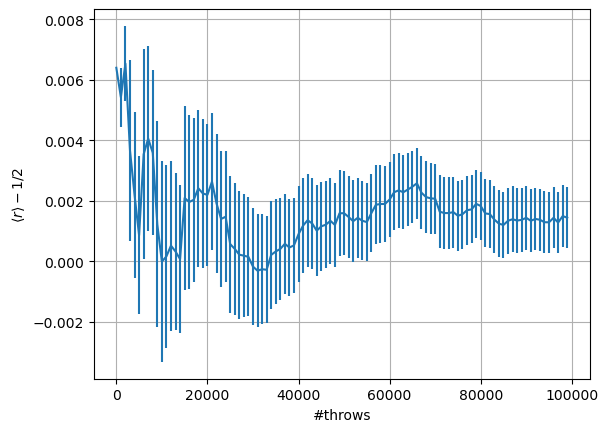

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#caricamento dei dati dal file
data = np.loadtxt('1.sum_r_prog.out')

#numero progressivo di estrazioni di r
x = np.arange(100)
x*=1000

plt.errorbar(x,data[:,0]-0.5,yerr=data[:,1])
plt.xlabel('#throws')
plt.ylabel(r"$\langle r \rangle -1/2$")
plt.grid(True)
plt.show()

### Grafico $\langle \sigma^2 \rangle - \frac{1}{12}$

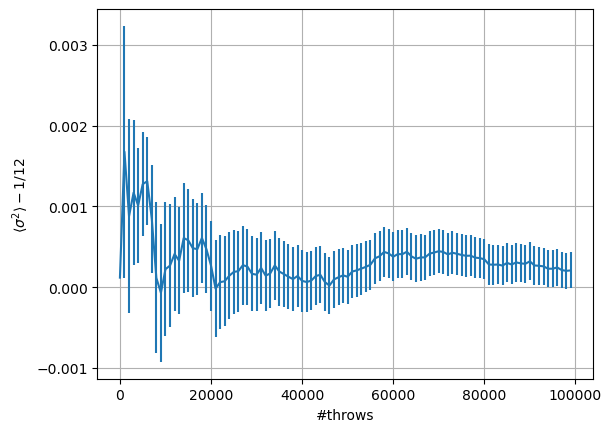

In [2]:
#caricamento dei dati dal file
data = np.loadtxt('1.sum_sigma_prog.out')

plt.errorbar(x,data[:,0]-1./12.,yerr=data[:,1])
plt.xlabel('#throws')
plt.ylabel(r'$\langle\sigma^2\rangle-1/12$')
plt.grid(True)
plt.show()

### Test del $\chi^2$

Il RNG estare numeri (inevitabilmente) attraverso un algoritmo: la sua conoscenza e quella del seed renderebbe prevedibili le estrazioni che di conseguenza vengono chiamate _pseudo-casuali_. Per testare quanto però appaiono realmente casuali è possibile calcolare
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
dove $M=100$ il numero di bin in cui è stato diviso [0,1], $n=10000$ il numero di estrazioni e $n_i$ il numero di conteggi nel bin $i$.  
Se la distribuzione fosse realmente uniforme, ci si aspetterebbe che $\chi^2 \simeq 100$, ovvero il numero di bins, mentre valori maggiori indicherebbero che è ciò è più improbabile.

Il seguente grafico mostra i valori del $\chi^2_j$ per $j=1, ..., 100$ e compie un fit con la relativa distribuzione.

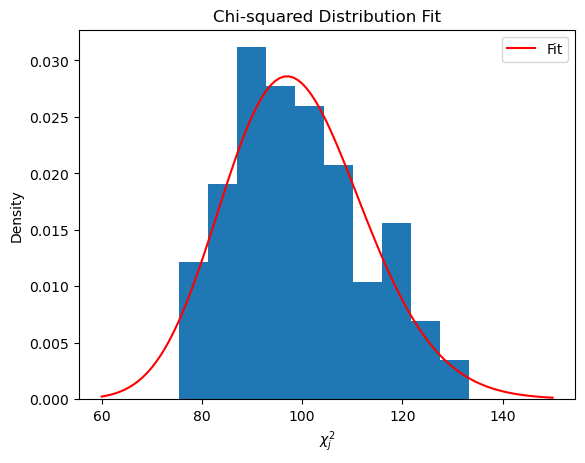

In [3]:
from scipy.stats import chi2

#caricamento dei dati dal file esterno
data = np.loadtxt("1.chi2j.out")

#creazione dell'istogramma
n_bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=n_bins, density=True)

#fit con la distribuzione del chi^2
df = len(data) - 1  # Gradi di libertà
x = np.linspace(60, 150, 100)  # Valori di chi^2 per il fit
pdf = chi2.pdf(x, df)  # PDF della distribuzione del chi^2

#sovrapposizione della curva di fit all'istogramma
ax.plot(x, pdf, 'r-', label='Fit')

ax.set_xlabel(r'$\chi^2_j$')
ax.set_ylabel('Density')
ax.set_title('Chi-squared Distribution Fit')
ax.legend()

plt.show()

## <span style="color:blue"> Esercizio 01.2 </span>

Al RNG sono stati aggiunti due metodi che campionano, tramite inversione della cumulativa, una variabile casuale distribuita con probabilità:
1. esponenziale, $p(x) = \lambda \exp(-\lambda x)$ con $x\in [0;+\infty]$
2. Lorentziana, $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $x\in [-\infty;+\infty]$

Si sono dunque ottenute $10^4$ stime della variabile media $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ per $N=1, 2, 10, 100$ lanci simulati di tre differenti dadi: uno standard (numeri estratti uniformemente) e due truccati (numeri estratti esponenzialmente e con una Lorentziana).

Per ogni dado, sono sotto riportati i grafici delle distribuzioni di $S_N$.  
Per mostrare la validità del Teorema del Limite Centrale (CLT), è stato fatto un fit con una Gaussiana il caso $N=100$  per il dado standard ed esponenziale, mentre per la variabile $S_{100}$ del dado Lorentziano, avendo varianza infinita, il CLT non è applicabile.

### Dado standard

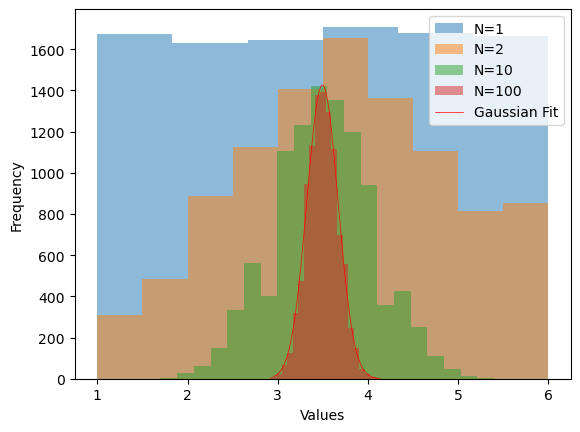

In [4]:
from scipy.optimize import curve_fit

#caricamento dei dati dal file esterno
data = np.loadtxt('2.standard_die.out')

#divisione dei dati in quattro gruppi di 10000 numeri ciascuno
data_1 = data[:10000]
data_2 = data[10000:20000]
data_3 = data[20000:30000]
data_4 = data[30000:]

#creazione degli istogrammi
plt.hist(data_1, bins=6, alpha=0.5, label='N=1')
plt.hist(data_2, bins=10, alpha=0.5, label='N=2')
plt.hist(data_3, bins=20, alpha=0.5, label='N=10')

#definizione gaussiana
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

#creazione dell'istogramma per N=100
hist, bin_edges = np.histogram(data_4, bins=20)

# Calcola il centro di ciascun bin
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fai il fit dei dati all'interno degli istogrammi con una funzione gaussiana
p0 = [np.mean(data_4), np.std(data_4), np.max(hist)]  # Parametri iniziali per il fit
params, cov = curve_fit(gaussian, bin_centers, hist, p0=p0)

# Crea un array di punti per la curva del fit
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 100)

# Calcola i valori della curva del fit
y_fit = gaussian(x_fit, *params)

# Crea il grafico dell'istogramma
plt.hist(data_4, bins=20, alpha=0.5, label='N=100')

# Crea il grafico del fit gaussiano
plt.plot(x_fit, y_fit, 'r-', linewidth=0.5, label='Gaussian Fit')



# Aggiungi legenda e etichette degli assi
plt.legend(loc='upper right')
plt.xlabel('Values')
plt.ylabel('Frequency')


# Mostra il grafico
plt.show()

## Dado esponenziale

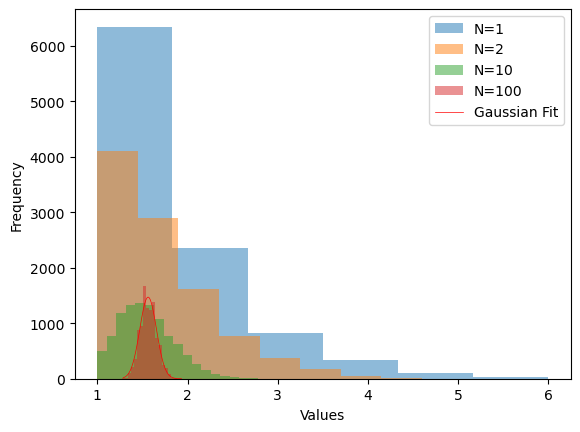

In [5]:
# Carica i dati dal file esterno
data = np.loadtxt('2.exponential_die.out')

# Dividi i dati in tre gruppi di 10000 numeri ciascuno
data_1 = data[:10000]
data_2 = data[10000:20000]
data_3 = data[20000:30000]
data_4 = data[30000:]

# Crea gli istogrammi
plt.hist(data_1, bins=6, alpha=0.5, label='N=1')
plt.hist(data_2, bins=10, alpha=0.5, label='N=2')
plt.hist(data_3, bins=20, alpha=0.5, label='N=10')

# Crea l'istogramma
hist, bin_edges = np.histogram(data_4, bins=20)

# Calcola il centro di ciascun bin
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fai il fit dei dati all'interno degli istogrammi con una funzione gaussiana
p0 = [np.mean(data_4), np.std(data_4), np.max(hist)]  # Parametri iniziali per il fit
params, cov = curve_fit(gaussian, bin_centers, hist, p0=p0)

# Crea un array di punti per la curva del fit
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 100)

# Calcola i valori della curva del fit
y_fit = gaussian(x_fit, *params)

# Crea il grafico dell'istogramma
plt.hist(data_4, bins=20, alpha=0.5, label='N=100')

# Crea il grafico del fit gaussiano
plt.plot(x_fit, y_fit, 'r-', linewidth=0.5, label='Gaussian Fit')

# Aggiungi legenda e etichette degli assi
plt.legend(loc='upper right')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Mostra il grafico
plt.show()

## Dado Lorentziano

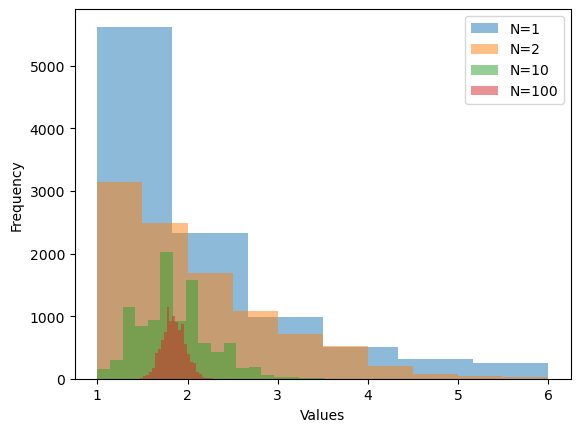

In [6]:
# Carica i dati dal file esterno
data = np.loadtxt('2.lorentzian_die.out')

# Dividi i dati in tre gruppi di 10000 numeri ciascuno
data_1 = data[:10000]
data_2 = data[10000:20000]
data_3 = data[20000:30000]
data_4 = data[30000:]

# Crea gli istogrammi
plt.hist(data_1, bins=6, alpha=0.5, label='N=1')
plt.hist(data_2, bins=10, alpha=0.5, label='N=2')
plt.hist(data_3, bins=20, alpha=0.5, label='N=10')
plt.hist(data_4, bins=30, alpha=0.5, label='N=100')

# Aggiungi legenda e etichette degli assi
plt.legend(loc='upper right')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Mostra il grafico
plt.show()

## <span style="color:blue"> Esercizio 01.3 </span>

L'esperimento di Buffon consiste nel lanciare un ago di lunghezza $L$ in modo completamente casuale su un piano orizzontale su cui sono disegnate delle righe orizzontali parallele ed equidistanziate. Detta $d>L$ la separazione di due righe contigue, si può dimostrare che la probabilità che l'ago intersechi una linea è: $P=\frac{2L}{\pi d}$.

È dunque possibile ottenere una stima di $\pi$ da
$$\pi=\frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Per avere della statistica si è calcolata la media progressiva di 100 blocchi, dove per ogni blocco si hanno 100 stime di $\pi$ e ogni stima di $\pi$ è ottenuta da $N_{th}=10000$ lanci dell'ago.

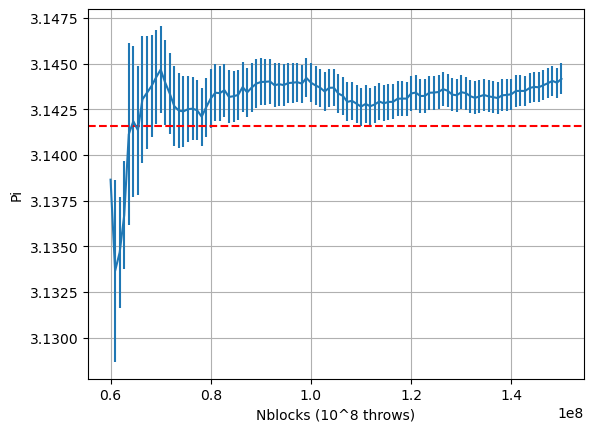

In [7]:
# Carica i dati dal file
data = np.loadtxt('3.Pi.out')

x*=1000000

plt.errorbar(x,data[:,0],yerr=data[:,1])

# Aggiungi la riga tratteggiata orizzontale al valore di pi
plt.axhline(np.pi, color='red', linestyle='--')

plt.xlabel('Nblocks (10^8 throws)')
plt.ylabel('Pi')
plt.grid(True)
plt.show()